State Farm Distracted Drivers
=============

Prev Exercises: Udacity:DeepLearning:TensorFlow:notMNIST

Baseline
------------

notMNIST:
This notebook uses the [notMNIST](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html) dataset to be used with python experiments. This dataset is designed to look like the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset, while looking a little more like real data: it's a harder task, and the data is a lot less 'clean' than MNIST.

In [11]:
import pprint
import sys
print sys.version

2.7.11 (default, Jan 28 2016, 14:07:46) 
[GCC 4.2.1 Compatible Apple LLVM 7.0.2 (clang-700.1.81)]


In [12]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import sys
import tarfile
from IPython.display import display, Image
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

## Analytics Specs

#### This Project

The specs should be in img_glbSpecs_SFDD

In [143]:
source 'img_glbSpecs_SFDD.py'

SyntaxError: invalid syntax (<ipython-input-143-85664d5b44ab>, line 1)

In [88]:
#print 'glbDataFile: %s' % (glbDataFile)
print 'glbRspClass: %s' % (glbRspClass)
print 'glbRspClassN: %d' % (glbRspClassN)
print 'glbPickleFile: %s' % (glbPickleFile)

glbRspClass: ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
glbRspClassN: 10
glbPickleFile: img_import_data_SFDD_ImgSz_32.pickle


#### notMNIST

In [89]:
# glbDataURL = 'http://yaroslavvb.com/upload/notMNIST/'
# glbImgSz = 32

### Import Data

First, we'll download the dataset to our local machine. 

In [16]:
def maybe_download(url, filename, expected_bytes = None):
  """Download a file if not present, and make sure it's the right size."""
  if not os.path.exists('data/' + filename):
    filename, _ = urlretrieve(url + filename, filename)
  statinfo = os.stat('data/' + filename)
  verified = False
  if (expected_bytes == None):
    if (statinfo.st_size > 0):
        verified = True
  else:      
    if (statinfo.st_size == expected_bytes):
        verified = True
    
  if verified:
    print('Found and verified', 'data/' + filename)
  else:
    raise Exception(
      'Failed to verify' + filename + '. Can you get to it with a browser?')
  return 'data/' + filename

dataFNm = maybe_download(glbDataFile['url'], glbDataFile['filename'])

('Found and verified', 'data/imgs.zip')


In [17]:
# url = 'http://yaroslavvb.com/upload/notMNIST/'

# def maybe_download(url, filename, expected_bytes):
#   """Download a file if not present, and make sure it's the right size."""
#   if not os.path.exists(filename):
#     filename, _ = urlretrieve(url + filename, filename)
#   statinfo = os.stat(filename)
#   if statinfo.st_size == expected_bytes:
#     print('Found and verified', filename)
#   else:
#     raise Exception(
#       'Failed to verify' + filename + '. Can you get to it with a browser?')
#   return filename

# train_filename = maybe_download('data/notMNIST_large.tar.gz', 247336696)
# test_filename = maybe_download('data/notMNIST_small.tar.gz', 8458043)

Extract the dataset from the compressed downloaded file(s).

In [18]:
def extract(filename, num_classes):
  print("Figure out automatically if data needs to be extracted")
  return
    
  tar = tarfile.open(filename)
  root = os.path.splitext(os.path.splitext(filename)[0])[0]  # remove .tar.gz
  print('Extracting data for %s. This may take a while. Please wait.' % root)
  sys.stdout.flush()
  tar.extractall()
  tar.close()
  # My edits: data_folders needs to be modified for the correct path
  data_folders = [
    os.path.join(root, d) for d in sorted(os.listdir(root)) if d != '.DS_Store']
  if len(data_folders) != num_classes:
    raise Exception(
      'Expected %d folders, one per class. Found %d instead.' % (
        num_classes, len(data_folders)))
  print(data_folders)
  return data_folders

if (glbDataFile['extract']):
    train_folders = extract(os.getcwd() + train_filename, glbRspClassN)
    test_folders  = extract(os.getcwd() + test_filename , glbRspClassN)

notMNINST:  
Extraction give you a set of directories, labelled A through J.
The data consists of characters rendered in a variety of fonts on a 28x28 image. The labels are limited to 'A' through 'J' (10 classes). The training set has about 500k and the obsNewSet 19000 labelled examples. Given these sizes, it should be possible to train models quickly on any machine.

---
Inspect data
---------

Let's take a peek at some of the data to make sure it looks sensible. 

In [19]:
from IPython.display import display, Image

Class: c0
  img_88531.jpg:


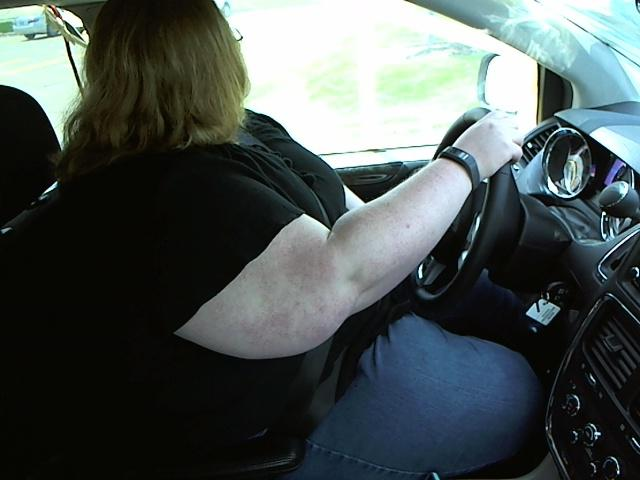

  img_58938.jpg:


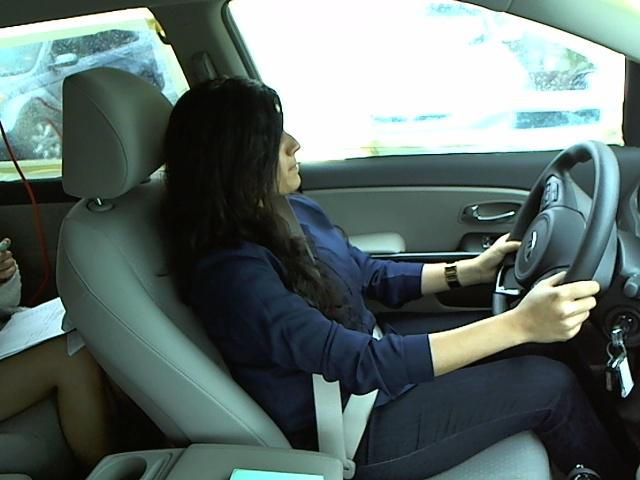

  img_101286.jpg:


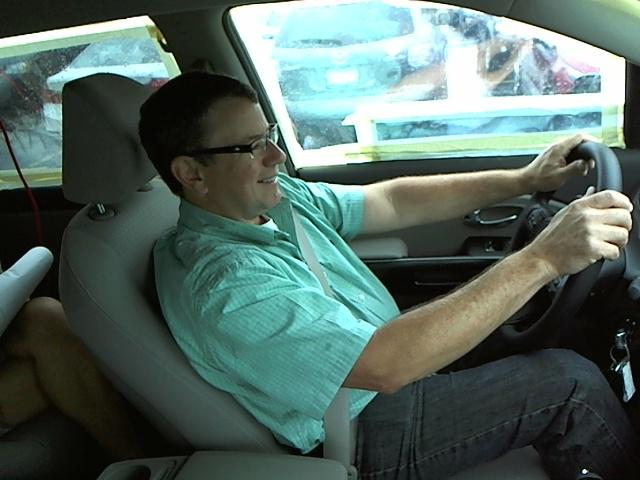

Class: c1
  img_15644.jpg:


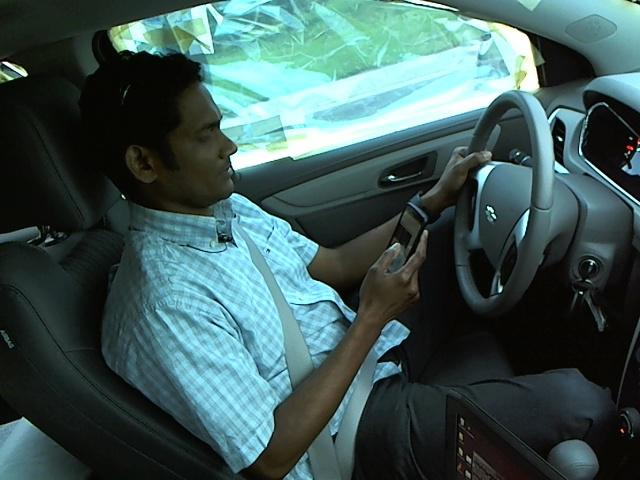

  img_28295.jpg:


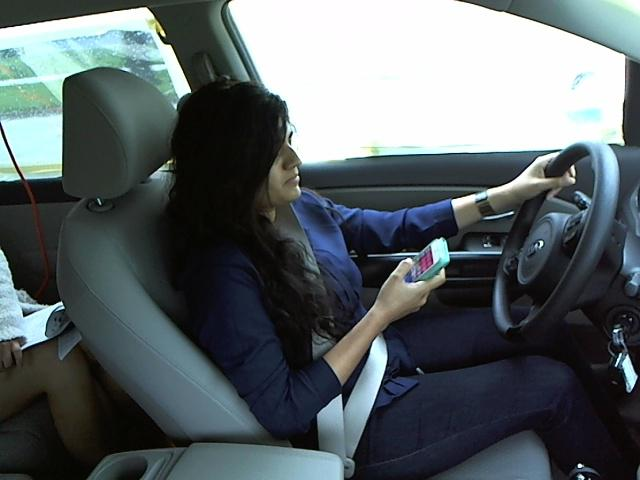

  img_34016.jpg:


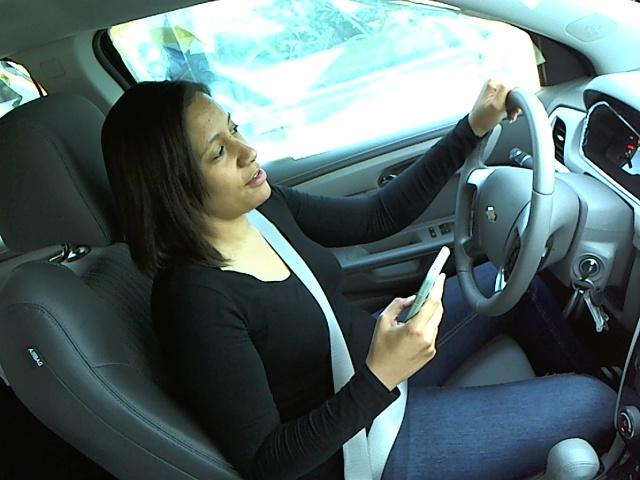

Class: c2
  img_23445.jpg:


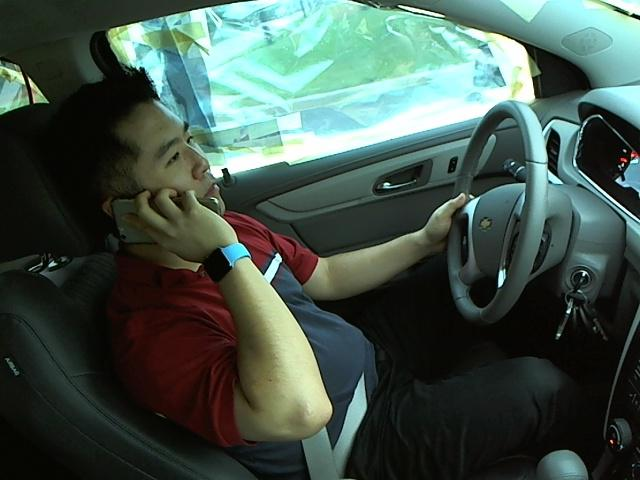

  img_100784.jpg:


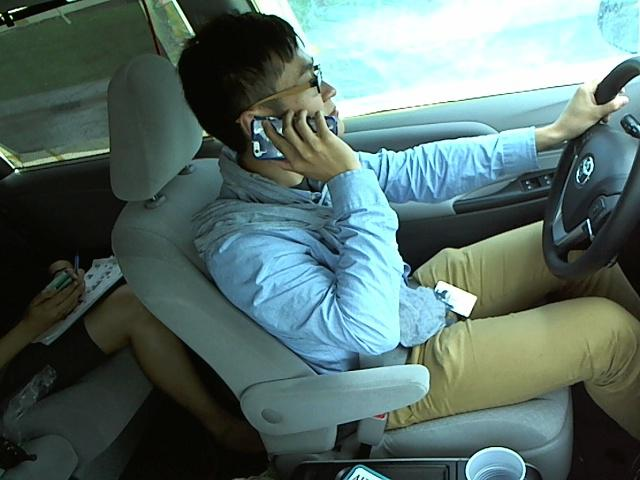

  img_88495.jpg:


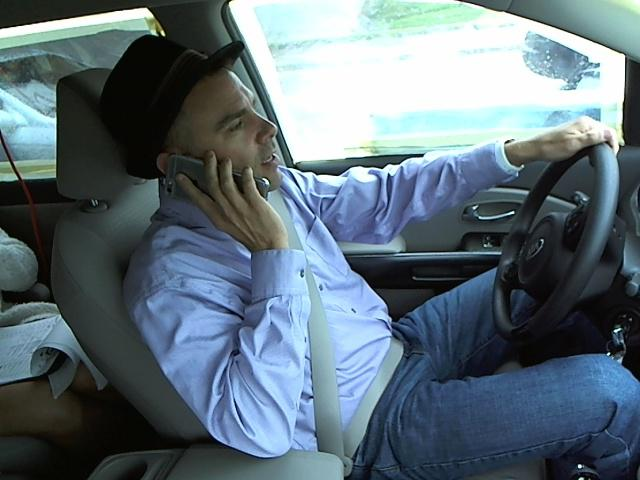

Class: c3
  img_53574.jpg:


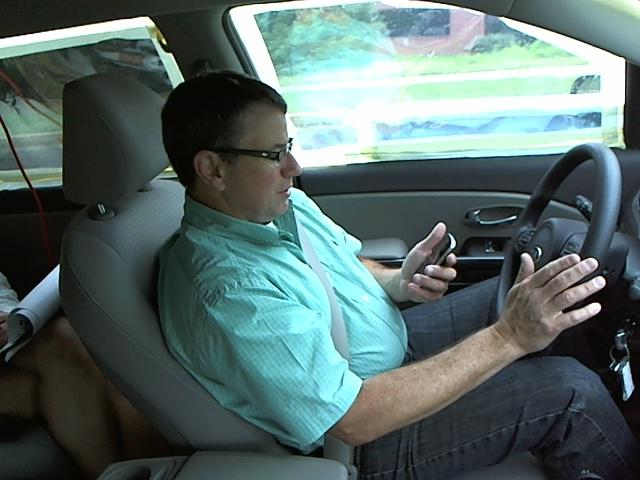

  img_58036.jpg:


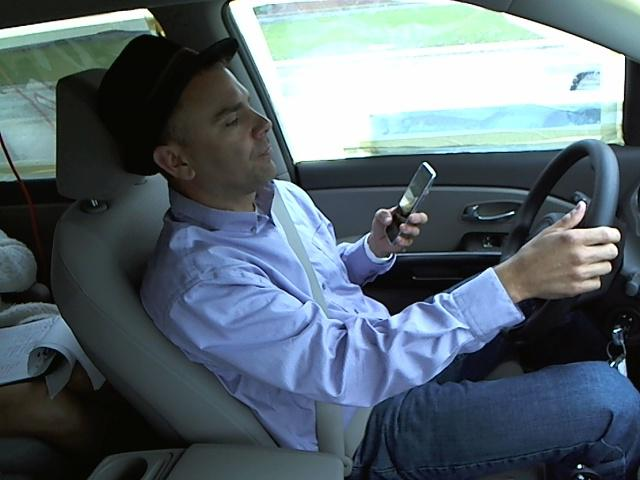

  img_31731.jpg:


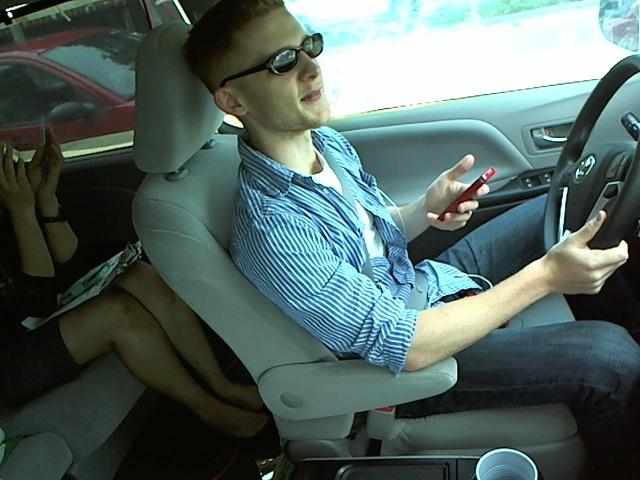

Class: c4
  img_37653.jpg:


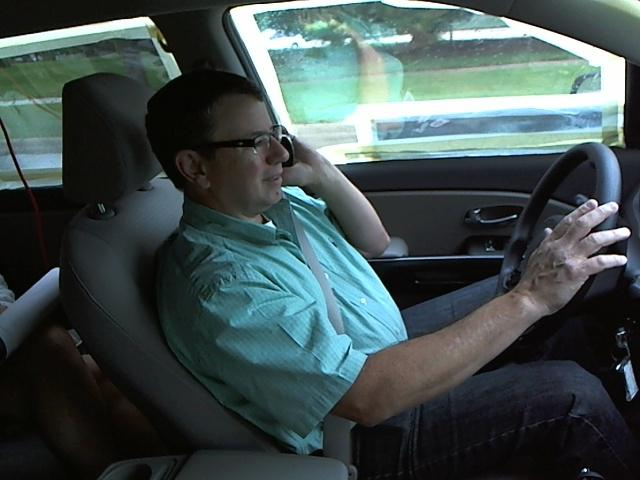

  img_13973.jpg:


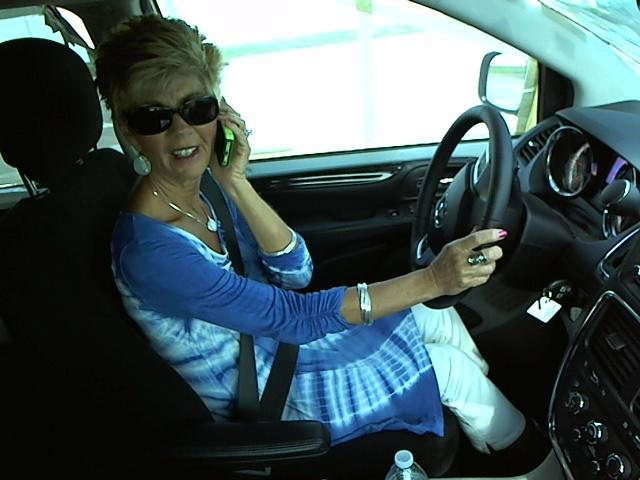

  img_17174.jpg:


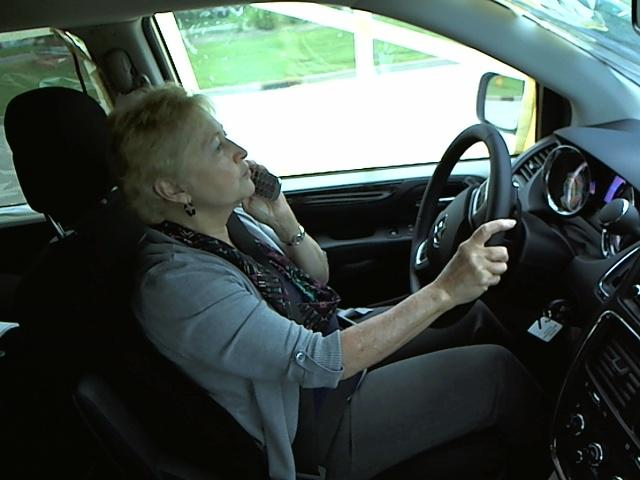

Class: c5
  img_70461.jpg:


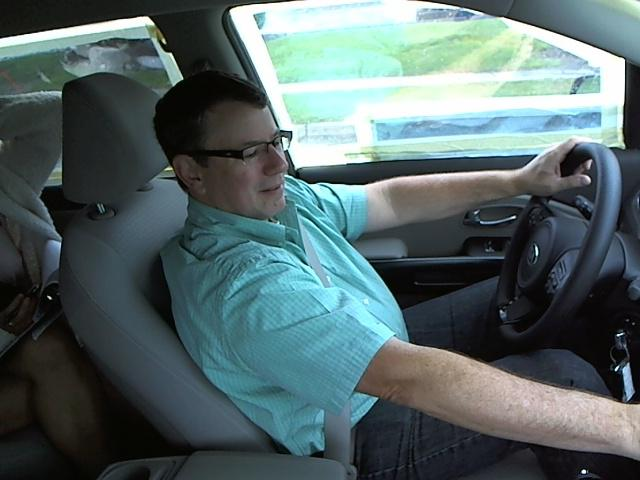

  img_274.jpg:


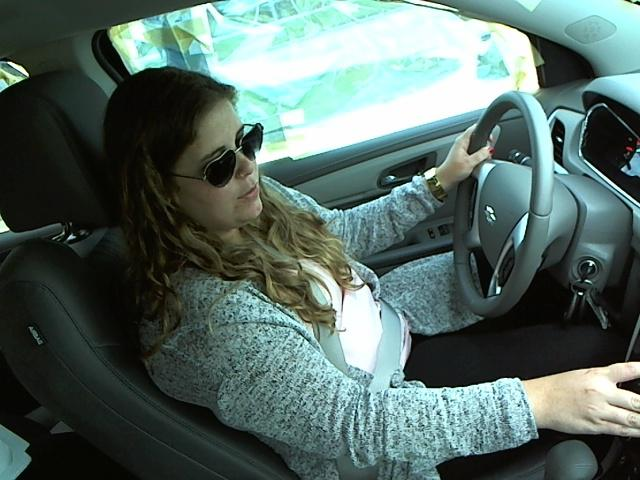

  img_17815.jpg:


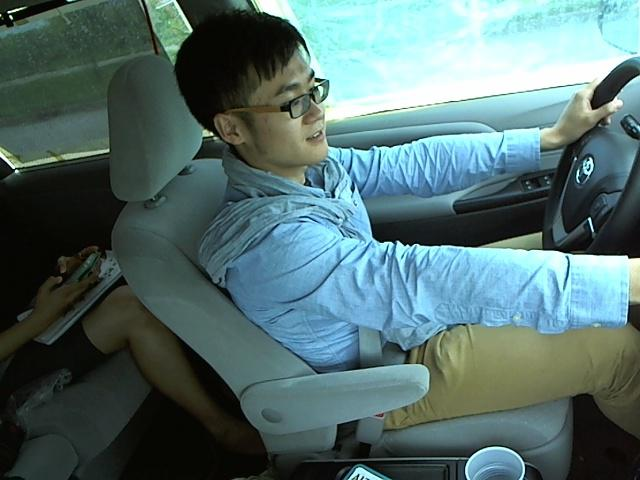

Class: c6
  img_89854.jpg:


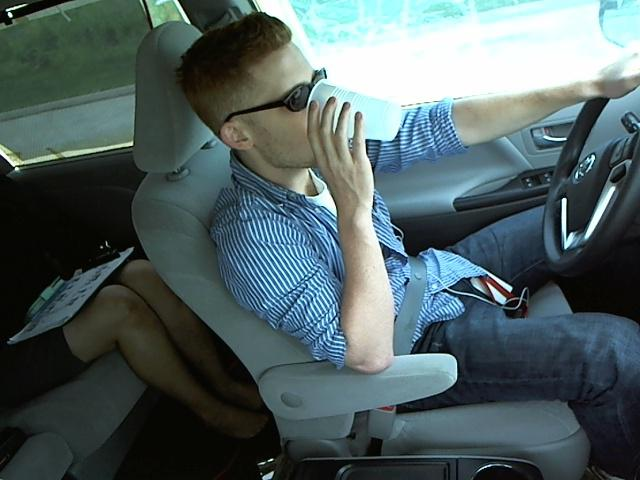

  img_13053.jpg:


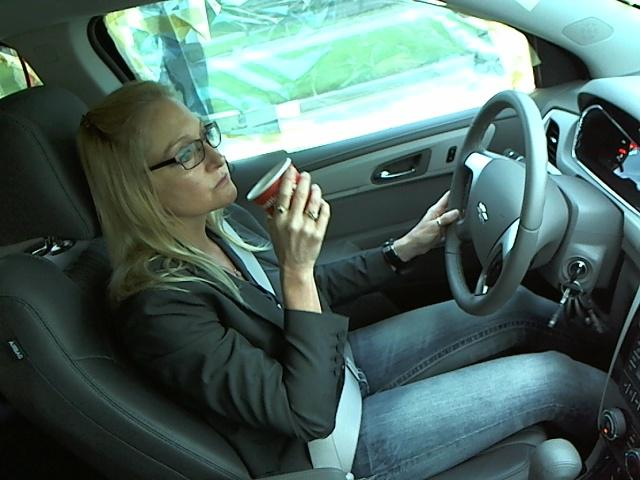

  img_91425.jpg:


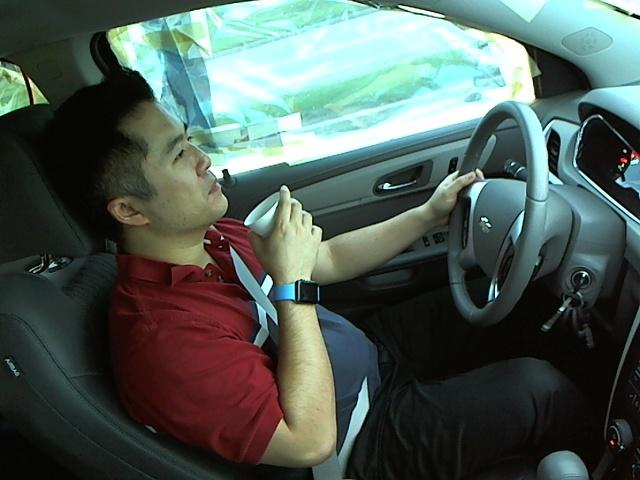

Class: c7
  img_54453.jpg:


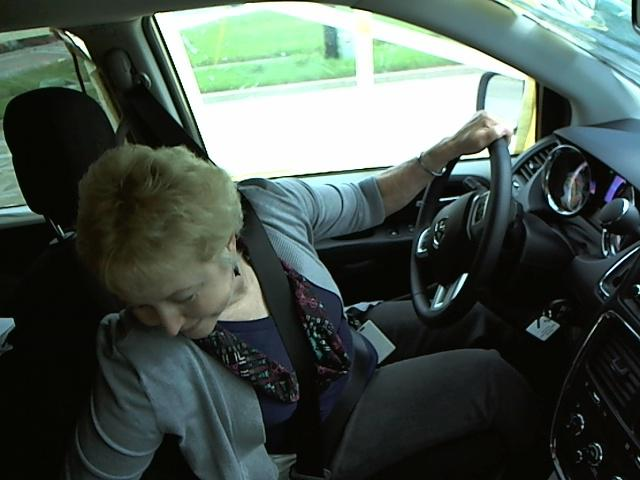

  img_23543.jpg:


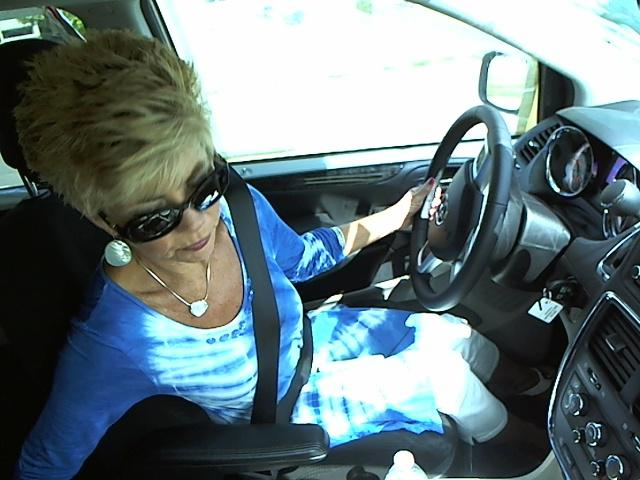

  img_27459.jpg:


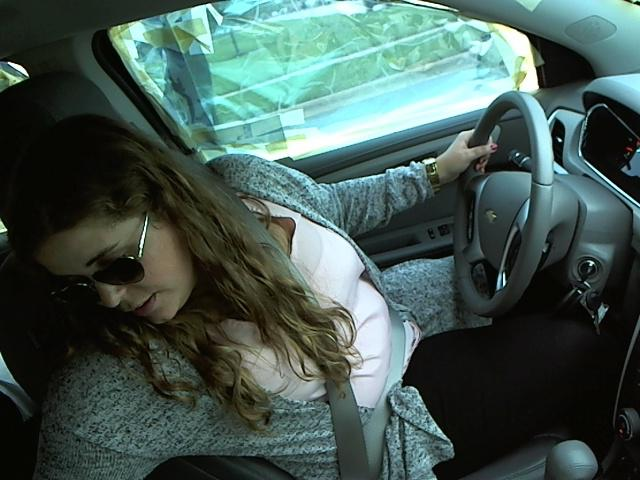

Class: c8
  img_49247.jpg:


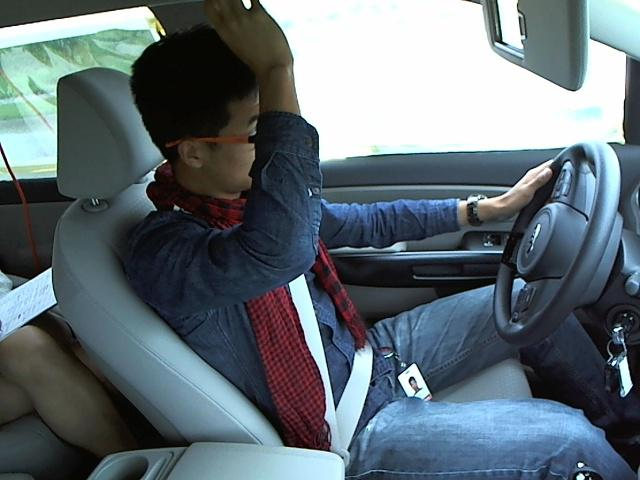

  img_531.jpg:


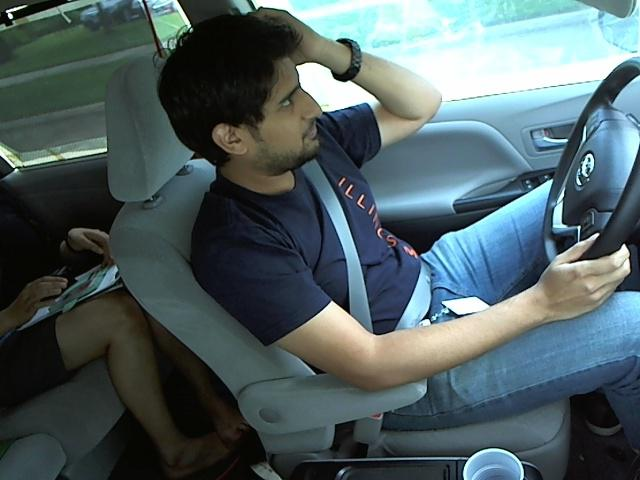

  img_71059.jpg:


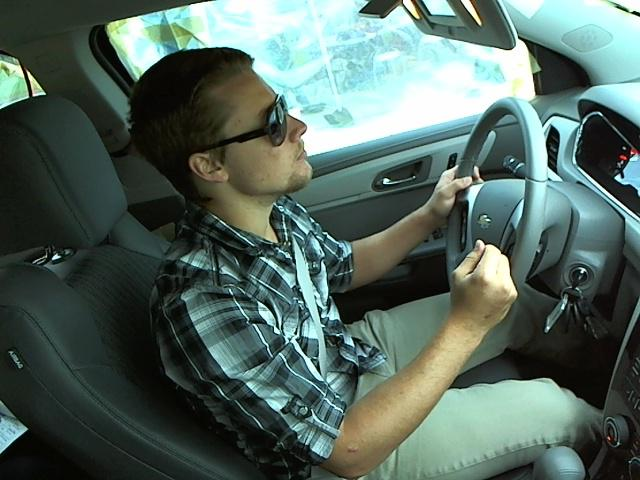

Class: c9
  img_12890.jpg:


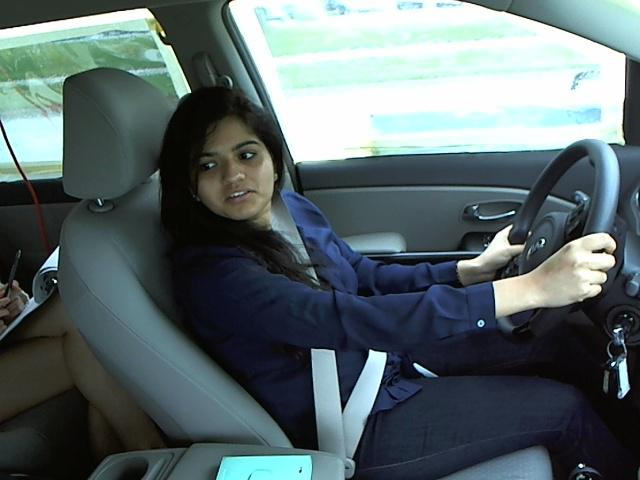

  img_75671.jpg:


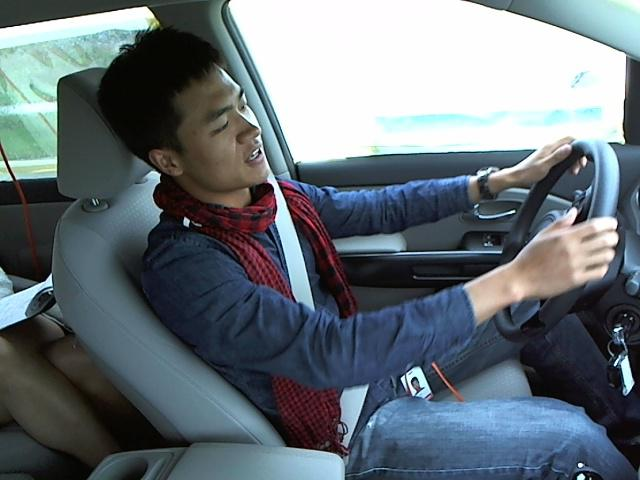

  img_69483.jpg:


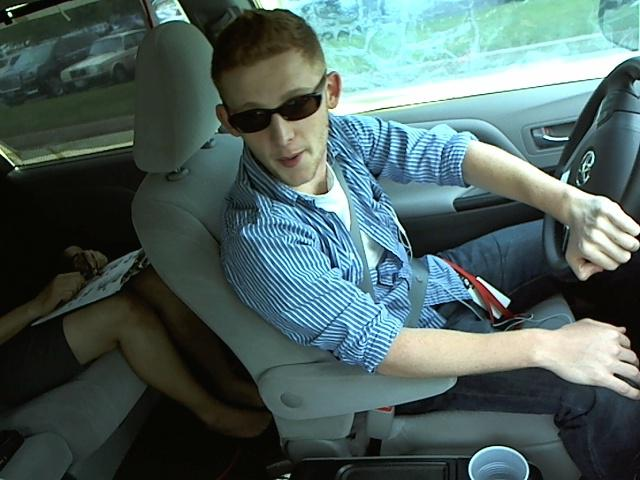

In [33]:
# Display sample train images
trnFoldersPth = os.getcwd() + '/data/' + glbDataFile['trnFoldersPth']
newFoldersPth = os.getcwd() + '/data/' + glbDataFile['newFoldersPth']
# print(trnFoldersPth)
# print(newFoldersPth)

for cls in glbRspClass:
    print 'Class: %s' % (cls)
    clsPth = trnFoldersPth + '/' + cls
    onlyfiles = [f for f in os.listdir(clsPth) if os.path.isfile(os.path.join(clsPth, f))]
    for ix in np.random.randint(0, len(onlyfiles), size = 3):
        print '  %s:' % (onlyfiles[ix])
#         print '    no size spec:'
#         jpgfile = Image(clsPth + '/' + onlyfiles[ix], format = 'jpg')
#         display(jpgfile)
#         print '    glbImgSz:%d' % (glbImgSz)        
        jpgfile = Image(clsPth + '/' + onlyfiles[ix], format = 'jpg', 
                        width = glbImgSz * 4, height = glbImgSz * 4)
        display(jpgfile)        

In [ ]:
Add code to display some ObsNew images too...

#### notMNINST:  
Each exemplar should be an image of a character A through J rendered in a different font. 

In [34]:
# Display sample train images
# train_folders_path = '/Users/bbalaji-2012/Documents/Work/Courses/Udacity/DeepLearning/code/tensorflow/examples/udacity/data/notMNIST_large/'
# glbImgSz = 28
# display(Image(train_folders_path + 'A/a2F6b28udHRm.png', \
#               width = glbImgSz * 4, height = glbImgSz * 4))
# display(Image(train_folders_path + 'B/bnVuaS50dGY=.png', \
#               width = glbImgSz * 4, height = glbImgSz * 4))
# display(Image(train_folders_path + 'C/cmlzay50dGY=.png', \
#               width = glbImgSz * 4, height = glbImgSz * 4))

Now let's load the data in a more manageable format.

We'll convert the entire dataset into a 3D array (image index, x, y) of floating point values, normalized to have approximately zero mean and standard deviation ~0.5 to make training easier down the road. The labels will be stored into a separate array (notMNINST only: of integers 0 through 9.)

A few images might not be readable, we'll just skip them.

In [40]:
trnFolders = os.getcwd() + '/data/' + glbDataFile['trnFoldersPth']
trnFolders = [trnFolders + '/' + cls for cls in glbRspClass]
print 'trnFolders: %s' % (trnFolders)
newFolders = [os.getcwd() + '/data/' + glbDataFile['newFoldersPth']]
print 'newFolders: %s' % (newFolders)

trnFolders: ['/Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/train/c0', '/Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/train/c1', '/Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/train/c2', '/Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/train/c3', '/Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/train/c4', '/Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/train/c5', '/Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/train/c6', '/Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/train/c7', '/Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/train/c8', '/Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/train/c9']
newFolders: ['/Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/test']


In [35]:
# data_folders_path = '/Users/bbalaji-2012/Documents/Work/Courses/Udacity/DeepLearning/code/tensorflow/examples/udacity/data/'
# train_folders = [data_folders_path + 'notMNIST_large/' + d \
#                  for d in sorted(os.listdir(data_folders_path + 'notMNIST_large/')) \
#                     if d != '.DS_Store']
# print train_folders
# test_folders  = [data_folders_path + 'notMNIST_small/' + d \
#                  for d in sorted(os.listdir(data_folders_path + 'notMNIST_small/')) \
#                     if d != '.DS_Store']
# print test_folders

In [44]:
from scipy import misc as spmisc

/Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/train/c0
  image_index: 0; img_100026.jpg:


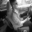

  image_index: 20; img_100828.jpg:


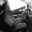

  image_index: 40; img_101613.jpg:


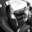

  image_index: 60; img_10514.jpg:


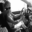

  image_index: 80; img_11035.jpg:


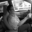

  image_index: 200; img_15760.jpg:


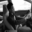

  image_index: 400; img_2334.jpg:


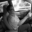

  image_index: 600; img_31424.jpg:


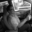

  image_index: 800; img_38288.jpg:


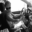

  image_index: 2000; img_81396.jpg:


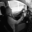

/Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/train/c1
  image_index: 4000; img_69700.jpg:


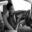

/Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/train/c2
  image_index: 6000; img_5579.jpg:


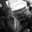

/Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/train/c3
  image_index: 8000; img_42902.jpg:


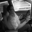

/Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/train/c4
/Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/train/c5
/Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/train/c6
/Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/train/c7
/Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/train/c8
  image_index: 20000; img_86214.jpg:


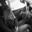

/Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/train/c9
('Identifiers:', 22424)
('Full dataset tensor:', (22424, 32, 32))
('Mean:', -0.14008653)
('Standard deviation:', 0.29186341)
('Labels:', (22424,))


In [105]:
def load(data_folders, max_num_images, max_check = True):
  ids = ['' for ix in xrange(max_num_images)]  
  dataset = np.ndarray(
    shape=(max_num_images, glbImgSz, glbImgSz), dtype=np.float32)
  labels = np.ndarray(shape=(max_num_images), dtype=np.int32)
  label_index = 0
  image_index = 0
  for folder in data_folders:
    print(folder)
    for image in os.listdir(folder):
      if max_check and (image_index >= max_num_images):
        raise Exception('More images than expected: %d >= %d' % (
          image_index, max_num_images))
      elif (image_index >= max_num_images):
        break
        
      image_file = os.path.join(folder, image)
      try:
        rsz_image_data = spmisc.imresize(ndimage.imread(image_file, flatten = not glbImgColor), 
                                      (glbImgSz, glbImgSz))
        image_data = (rsz_image_data.astype(float) -
                      glbImgPixelDepth / 2) / glbImgPixelDepth
        if image_data.shape != (glbImgSz, glbImgSz):
          raise Exception('Unexpected image shape: %s' % str(image_data.shape))
        
        ids[image_index] = image
        dataset[image_index, :, :] = image_data
        labels[image_index] = label_index
        
        if  ((image_index >= 100000) and                            (image_index % 200000 == 0)) or \
            ((image_index >= 10000 ) and (image_index < 100000) and (image_index % 20000  == 0)) or \
            ((image_index >= 1000  ) and (image_index < 10000 ) and (image_index % 2000   == 0)) or \
            ((image_index >= 100   ) and (image_index < 1000  ) and (image_index % 200    == 0)) or \
            ((image_index >= 10    ) and (image_index < 100   ) and (image_index % 20     == 0)) or \
             (image_index ==  0    ) :
            print '  image_index: %d; %s:' % (image_index, image)
            display(spmisc.toimage(rsz_image_data))
            
        image_index += 1            
      except IOError as e:
        print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
    label_index += 1
    
  num_images = image_index
  ids = ids[0:num_images]  
  dataset = dataset[0:num_images, :, :]
  labels = labels[0:num_images]
#   if num_images < min_num_images:
#     raise Exception('Many fewer images than expected: %d < %d' % (
#         num_images, min_num_images))
  print('Identifiers:', len(ids))
  print('Full dataset tensor:', dataset.shape)
  print('Mean:', np.mean(dataset))
  print('Standard deviation:', np.std(dataset))
  print('Labels:', labels.shape)
  return ids, dataset, labels

#smpObsTrnIdn, smpObsTrnFtr, smpObsTrnRsp = load(trnFolders, 250, max_check = False); print smpObsTrnIdn[10:15]
glbObsTrnIdn, glbObsTrnFtr, glbObsTrnRsp = load(trnFolders, 22435)

['img_12203.jpg', 'img_12237.jpg', 'img_12238.jpg', 'img_12247.jpg', 'img_12279.jpg']
/Users/bbalaji-2012/Documents/Work/DataScience/Kaggle/StateFarm/data/imgs/test
  image_index: 0; img_1.jpg:


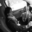

  image_index: 20; img_100017.jpg:


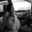

  image_index: 40; img_100040.jpg:


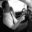

  image_index: 60; img_100066.jpg:


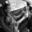

  image_index: 80; img_100086.jpg:


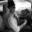

  image_index: 200; img_10022.jpg:


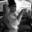

  image_index: 400; img_100459.jpg:


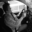

  image_index: 600; img_100684.jpg:


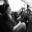

  image_index: 800; img_100910.jpg:


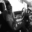

  image_index: 2000; img_10358.jpg:


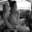

  image_index: 4000; img_12655.jpg:


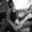

  image_index: 6000; img_14950.jpg:


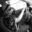

  image_index: 8000; img_17241.jpg:


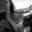

  image_index: 20000; img_31120.jpg:


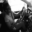

  image_index: 40000; img_5424.jpg:


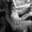

  image_index: 60000; img_77326.jpg:


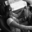

('Identifiers:', 79726)
('Full dataset tensor:', (79726, 32, 32))
('Mean:', -0.13392374)
('Standard deviation:', 0.2979852)
('Labels:', (79726,))


In [107]:
print glbObsTrnIdn[100:105]
glbObsNewIdn, glbObsNewFtr, glbObsNewRsp = load(newFolders, 79726)

In [108]:
print glbObsNewIdn[1000:1005]
savObsNewRsp = glbObsNewRsp
glbObsNewRsp[:] = -1
print glbObsNewRsp[1000:1005]

['img_101147.jpg', 'img_101148.jpg', 'img_101149.jpg', 'img_10115.jpg', 'img_101150.jpg']
[-1 -1 -1 -1 -1]


In [49]:
# def load(data_folders, min_num_images, max_num_images):
#   dataset = np.ndarray(
#     shape=(max_num_images, glbImgSz, glbImgSz), dtype=np.float32)
#   labels = np.ndarray(shape=(max_num_images), dtype=np.int32)
#   label_index = 0
#   image_index = 0
#   for folder in data_folders:
#     print(folder)
#     for image in os.listdir(folder):
#       if image_index >= max_num_images:
#         raise Exception('More images than expected: %d >= %d' % (
#           image_index, max_num_images))
#       image_file = os.path.join(folder, image)
#       try:
#         image_data = (ndimage.imread(image_file).astype(float) -
#                       glbImgPixelDepth / 2) / glbImgPixelDepth
#         if image_data.shape != (glbImgSz, glbImgSz):
#           raise Exception('Unexpected image shape: %s' % str(image_data.shape))
#         dataset[image_index, :, :] = image_data
#         labels[image_index] = label_index
#         image_index += 1
#       except IOError as e:
#         print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
#     label_index += 1
#   num_images = image_index
#   dataset = dataset[0:num_images, :, :]
#   labels = labels[0:num_images]
#   if num_images < min_num_images:
#     raise Exception('Many fewer images than expected: %d < %d' % (
#         num_images, min_num_images))
#   print('Full dataset tensor:', dataset.shape)
#   print('Mean:', np.mean(dataset))
#   print('Standard deviation:', np.std(dataset))
#   print('Labels:', labels.shape)
#   return dataset, labels

# glbObsTrnFtr, glbObsTrnRsp = load(train_folders, 450000, 550000)
# glbObsNewFtr, glbObsNewRsp = load(test_folders, 18000, 20000)

We expect the data to be balanced across classes. Verify that.

In [109]:
print 'glbObsTrnRsp class knts: '
print (np.unique(glbObsTrnRsp, return_counts = True))
print 'glbObsNewRsp class knts: '
print (np.unique(glbObsNewRsp, return_counts = True))

glbObsTrnRsp class knts: 
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32), array([2489, 2267, 2317, 2346, 2326, 2312, 2325, 2002, 1911, 2129]))
glbObsNewRsp class knts: 
(array([-1], dtype=int32), array([79726]))


In [110]:
#print type(glbObsTrnRsp); print glbObsTrnRsp.shape; print glbObsTrnRsp[0:10]
# print np.sum(glbObsTrnRsp == 0)
# print np.unique(glbObsTrnRsp)
# print 'train labels freqs: %s' % \
#     ([np.sum(glbObsTrnRsp == thsLabel) for thsLabel in np.unique(glbObsTrnRsp)])

Save imported data.

In [112]:
try:
  f = open('data/' + glbPickleFile, 'wb')
  save = {
    'glbObsTrnIdn': glbObsTrnIdn,
    'glbObsTrnFtr': glbObsTrnFtr,
    'glbObsTrnRsp': glbObsTrnRsp,
#     'glbObsVldFtr': glbObsVldFtr,
#     'glbObsVldRsp': glbObsVldRsp,
    'glbObsNewIdn': glbObsNewIdn,
    'glbObsNewFtr': glbObsNewFtr,
    'glbObsNewRsp': glbObsNewRsp,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', glbPickleFile, ':', e)
  raise
    
statinfo = os.stat('data/' + glbPickleFile)
print('Compressed pickle size:', statinfo.st_size)    

('Compressed pickle size:', 420848942)


In [133]:
with open('data/' + glbPickleFile, 'rb') as f:
  save = pickle.load(f)
#   train_dataset = save['train_dataset']
#   train_labels = save['train_labels']
#   valid_dataset = save['valid_dataset']
#   valid_labels = save['valid_labels']
  glbObsNewIdn = save['glbObsNewIdn']
  glbObsNewFtr = save['glbObsNewFtr']
  glbObsNewRsp = save['glbObsNewRsp']
#   test_dataset = save['test_dataset']
#   test_labels = save['test_labels']
  del save  # hint to help gc free up memory
#   print('Training set', train_dataset.shape, train_labels.shape)
#   print('Validation set', valid_dataset.shape, valid_labels.shape)
  print('New set:', len(glbObsNewIdn), glbObsNewFtr.shape, glbObsNewRsp.shape)

('New set:', 79726, (79726, 32, 32), (79726,))


---
Inspect Resized Image Data
---------

Let's verify that the data still looks good. Displaying a sample of the labels and images from the ndarray. 

In [114]:
def mydisplayImages(obsIdn, obsFtr, obsRsp):
    imgIxLst = np.random.random_integers(0, obsFtr.shape[0] - 1, 10)
    for imgIx in imgIxLst:
        if (obsRsp[imgIx] > -1):
            print '  imgIx: %d; id: %s; label: %s' % \
                (imgIx, obsIdn[imgIx], glbRspClass[obsRsp[imgIx]])
        else:    
            print '  imgIx: %d; id: %s; label: None' % (imgIx, obsIdn[imgIx])    
        plt.figure
        plt.imshow(obsFtr[imgIx,:,:], cmap = plt.cm.gray)
        plt.show()

train set:
  imgIx: 1998; id: img_81350.jpg; label: c0


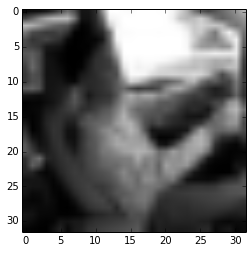

  imgIx: 16380; id: img_9998.jpg; label: c6


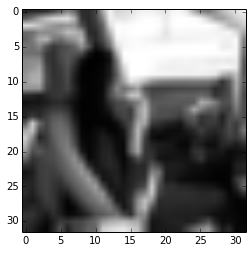

  imgIx: 12179; id: img_25277.jpg; label: c5


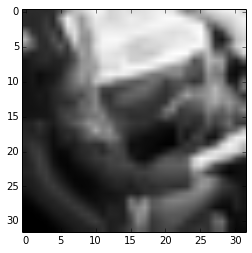

  imgIx: 20739; id: img_28025.jpg; label: c9


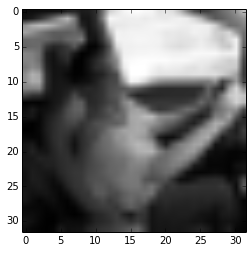

  imgIx: 16429; id: img_101869.jpg; label: c7


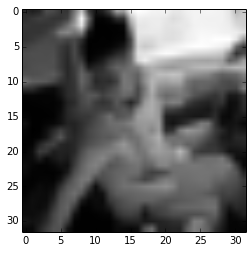

  imgIx: 13843; id: img_91231.jpg; label: c5


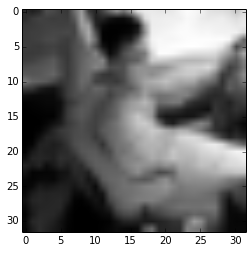

  imgIx: 11535; id: img_92193.jpg; label: c4


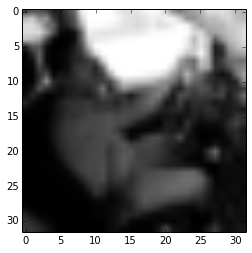

  imgIx: 18030; id: img_8399.jpg; label: c7


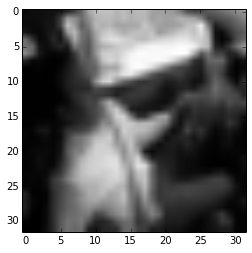

  imgIx: 10849; id: img_64316.jpg; label: c4


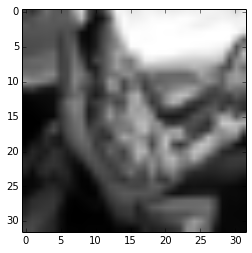

  imgIx: 16244; id: img_94378.jpg; label: c6


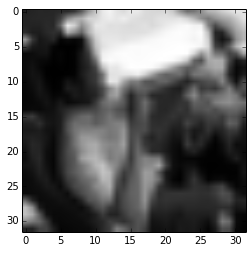

In [116]:
print 'Trn set:'; mydisplayImages(glbObsTrnIdn, glbObsTrnFtr, glbObsTrnRsp)

In [59]:
# dspLabels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

# print 'train set:'
# imgIxLst = np.random.random_integers(0, glbObsTrnFtr.shape[0] - 1, 10)
# for imgIx in imgIxLst:
#     print 'imgIx: %d: label: %s' % (imgIx, dspLabels[glbObsTrnRsp[imgIx]])
#     plt.figure
#     plt.imshow(glbObsTrnFtr[imgIx,:,:], cmap = plt.cm.gray)
#     plt.show()

New set:
  imgIx: 6018; id: img_14973.jpg; label: None


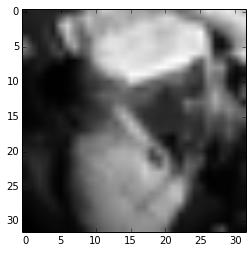

  imgIx: 54909; id: img_71431.jpg; label: None


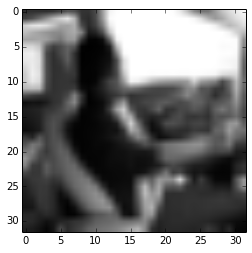

  imgIx: 17412; id: img_28095.jpg; label: None


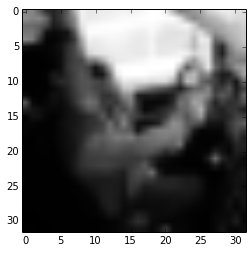

  imgIx: 66441; id: img_84692.jpg; label: None


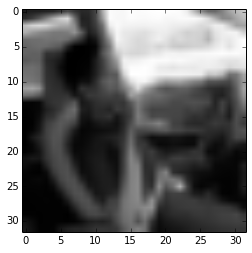

  imgIx: 29698; id: img_42352.jpg; label: None


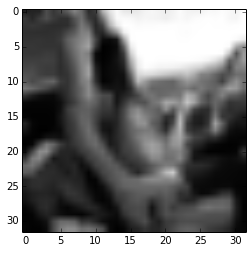

  imgIx: 21633; id: img_33020.jpg; label: None


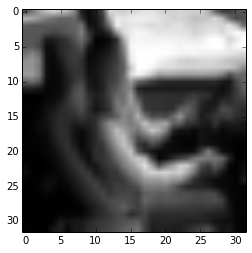

  imgIx: 67069; id: img_85415.jpg; label: None


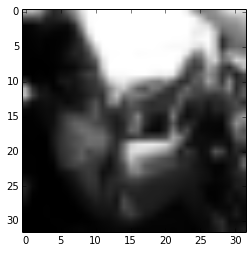

  imgIx: 46206; id: img_61395.jpg; label: None


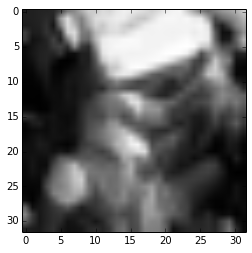

  imgIx: 55126; id: img_71687.jpg; label: None


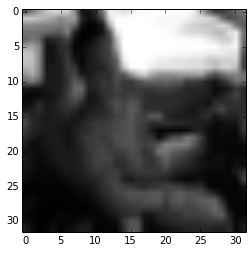

  imgIx: 53542; id: img_69827.jpg; label: None


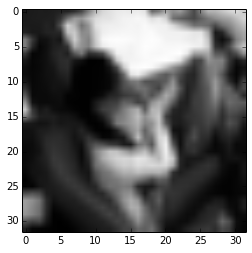

imgIx: 61376: label: None


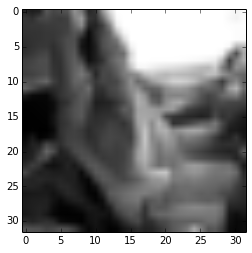

imgIx: 57757: label: None


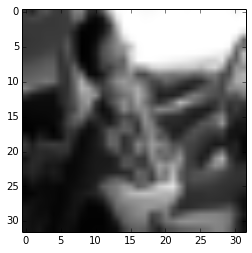

imgIx: 47410: label: None


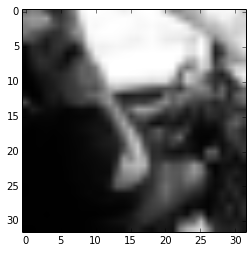

imgIx: 50825: label: None


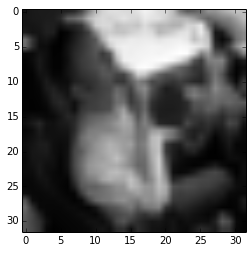

imgIx: 36676: label: None


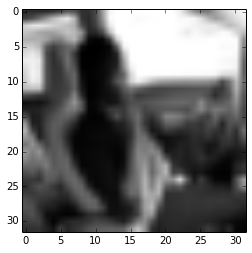

imgIx: 30483: label: None


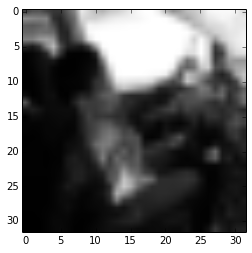

imgIx: 37873: label: None


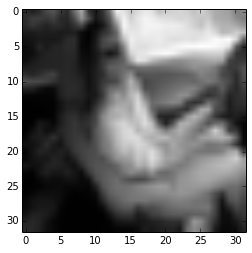

imgIx: 40371: label: None


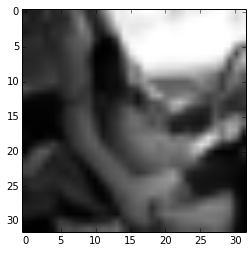

imgIx: 28404: label: None


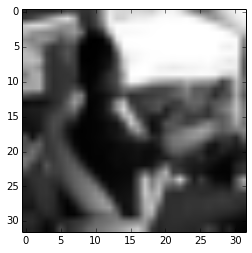

imgIx: 36545: label: None


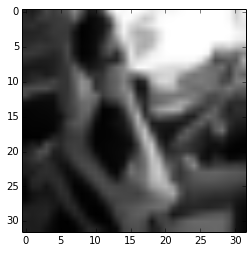

In [117]:
print 'New set:'; mydisplayImages(glbObsNewIdn, glbObsNewFtr, glbObsNewRsp)

### Shuffle data

Next, we'll randomize the data. It's important to have the labels well shuffled for the training and test distributions to match.

In [129]:
# print type(glbObsTrnIdn)
# smpObsTrnIdn = glbObsTrnIdn[0:4]
# print smpObsTrnIdn
# print [smpObsTrnIdn[ix] for ix in [3, 1, 2, 0]]
# smpObsTrnIdn = [smpObsTrnIdn[ix] for ix in [3, 1, 2, 0]]
# print smpObsTrnIdn

<type 'list'>
['img_100026.jpg', 'img_10003.jpg', 'img_100050.jpg', 'img_100074.jpg']
['img_100074.jpg', 'img_10003.jpg', 'img_100050.jpg', 'img_100026.jpg']
['img_100074.jpg', 'img_10003.jpg', 'img_100050.jpg', 'img_100026.jpg']


In [130]:
np.random.seed(glbObsShuffleSeed)
def randomize(ids, dataset, labels):
  permutation = np.random.permutation(labels.shape[0])
  shuffled_ids = [ids[ix] for ix in permutation]
  shuffled_dataset = dataset[permutation,:,:]
  shuffled_labels = labels[permutation]
  return shuffled_ids, shuffled_dataset, shuffled_labels

glbObsTrnIdn, glbObsTrnFtr, glbObsTrnRsp = randomize(glbObsTrnIdn, glbObsTrnFtr, glbObsTrnRsp)
#glbObsNewIdn, glbObsNewFtr, glbObsNewRsp = randomize(glbObsNewIdn, glbObsNewFtr, glbObsNewRsp)

In [60]:
# np.random.seed(133)
# def randomize(dataset, labels):
#   permutation = np.random.permutation(labels.shape[0])
#   shuffled_dataset = dataset[permutation,:,:]
#   shuffled_labels = labels[permutation]
#   return shuffled_dataset, shuffled_labels
# glbObsTrnFtr, glbObsTrnRsp = randomize(glbObsTrnFtr, glbObsTrnRsp)
# glbObsNewFtr, glbObsNewRsp = randomize(glbObsNewFtr, glbObsNewRsp)

Check if data is still good after shuffling!

shuffled Trn set:
  imgIx: 16454; id: img_64535.jpg; label: c2


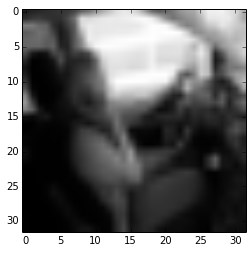

  imgIx: 7390; id: img_17025.jpg; label: c2


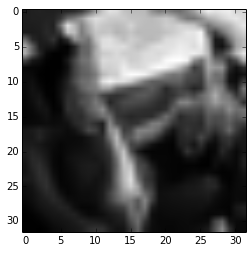

  imgIx: 8078; id: img_86976.jpg; label: c0


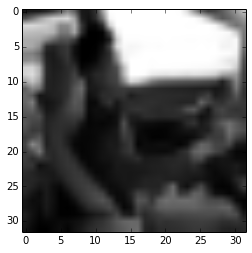

  imgIx: 21232; id: img_6938.jpg; label: c2


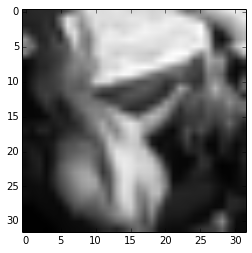

  imgIx: 15937; id: img_51095.jpg; label: c9


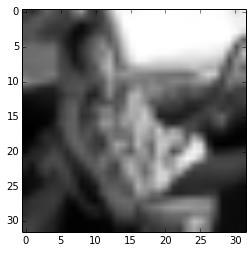

  imgIx: 6158; id: img_21315.jpg; label: c7


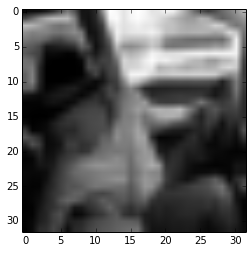

  imgIx: 940; id: img_12231.jpg; label: c8


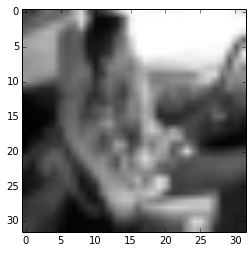

  imgIx: 5581; id: img_40944.jpg; label: c0


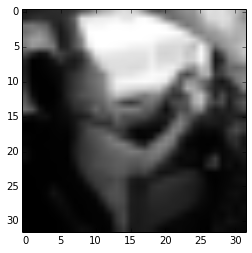

  imgIx: 247; id: img_46103.jpg; label: c2


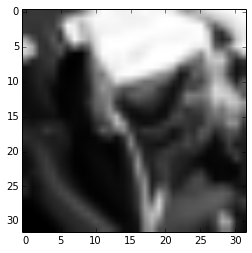

  imgIx: 15779; id: img_65559.jpg; label: c0


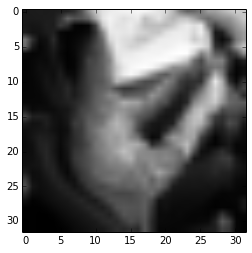

shuffled New set:
  imgIx: 41597; id: img_83982.jpg; label: None


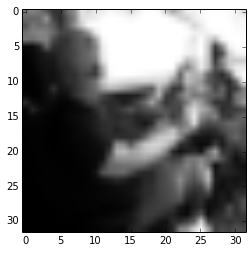

  imgIx: 47985; id: img_67052.jpg; label: None


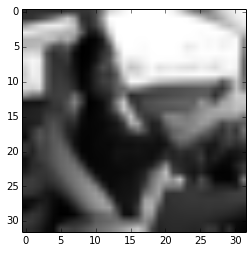

  imgIx: 64193; id: img_62477.jpg; label: None


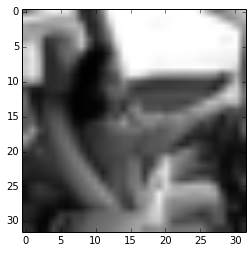

  imgIx: 68657; id: img_82737.jpg; label: None


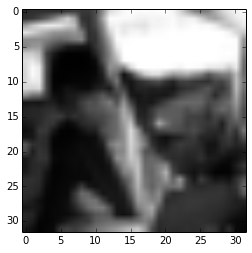

  imgIx: 61216; id: img_88962.jpg; label: None


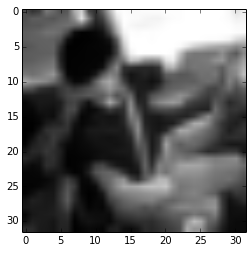

  imgIx: 68700; id: img_94374.jpg; label: None


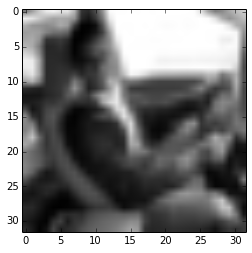

  imgIx: 77282; id: img_25609.jpg; label: None


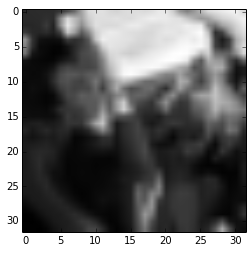

  imgIx: 43848; id: img_38003.jpg; label: None


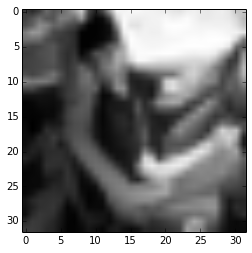

  imgIx: 3589; id: img_47193.jpg; label: None


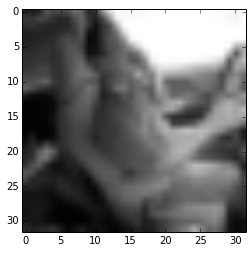

  imgIx: 3119; id: img_52674.jpg; label: None


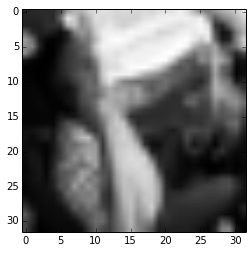

In [132]:
print 'shuffled Trn set:'; mydisplayImages(glbObsTrnIdn, glbObsTrnFtr, glbObsTrnRsp)
#print 'shuffled New set:'; mydisplayImages(glbObsNewIdn, glbObsNewFtr, glbObsNewRsp)

Prune the training data as needed. Depending on your computer setup, you might not be able to fit it all in memory, and you can tune obsTrnN as needed.

Also create a validation dataset for hyperparameter tuning.

In [137]:
obsTrnN = glbObsTrnFtr.shape[0] # or fixed number e.g. 20000
obsVldN = int(obsTrnN * 0.2)
print 'obsTrnN: %d; obsVldN: %d' % (obsTrnN, obsVldN)

glbObsVldIdn = glbObsTrnIdn[:obsVldN]
glbObsVldFtr = glbObsTrnFtr[:obsVldN,:,:]
glbObsVldRsp = glbObsTrnRsp[:obsVldN]

glbObsFitIdn = glbObsTrnIdn[obsVldN:obsVldN+obsTrnN]
glbObsFitFtr = glbObsTrnFtr[obsVldN:obsVldN+obsTrnN,:,:]
glbObsFitRsp = glbObsTrnRsp[obsVldN:obsVldN+obsTrnN]

print('   Fitting:', len(glbObsFitIdn), glbObsFitFtr.shape, glbObsFitRsp.shape)
print('Validation:', len(glbObsVldIdn), glbObsVldFtr.shape, glbObsVldRsp.shape)

obsTrnN: 22424; obsVldN: 4484
('   Fitting:', 17940, (17940, 32, 32), (17940,))
('Validation:', 4484, (4484, 32, 32), (4484,))


In [71]:
# obsTrnN = glbObsTrnFtr.shape[0]
# #obsTrnN = 200000
# obsVldN = 10000

# glbObsVldFtr = glbObsTrnFtr[:obsVldN,:,:]
# glbObsVldRsp = glbObsTrnRsp[:obsVldN]
# glbObsTrnFtr = glbObsTrnFtr[obsVldN:obsVldN+obsTrnN,:,:]
# glbObsTrnRsp = glbObsTrnRsp[obsVldN:obsVldN+obsTrnN]
# print('Training', glbObsTrnFtr.shape, glbObsTrnRsp.shape)
# print('Validation', glbObsVldFtr.shape, glbObsVldRsp.shape)

In [146]:
print 'glbObsVldRsp class knts & Trn ratios: '
print (np.unique(glbObsVldRsp, return_counts = True))
print (np.unique(glbObsVldRsp, return_counts = True)[1] * 1.0 / 
       np.unique(glbObsTrnRsp, return_counts = True)[1])

glbObsVldRsp class knts & Trn ratios: 
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32), array([481, 468, 450, 453, 471, 466, 458, 400, 395, 442]))
[ 0.1932503   0.20644023  0.19421666  0.19309463  0.20249355  0.20155709
  0.19698925  0.1998002   0.20669806  0.20760921]


Finally, let's save the data for later reuse:  
Remember to save previous pickled file as '_unshuffled'

In [75]:
# glbPickleFile = os.getcwd() + '/data/notMNIST.pickle'
# print glbPickleFile

In [138]:
try:
  f = open('data/' + glbPickleFile, 'wb')
  save = {
    'glbObsTrnIdn': glbObsTrnIdn,
    'glbObsTrnFtr': glbObsTrnFtr,
    'glbObsTrnRsp': glbObsTrnRsp,
        
    'glbObsFitIdn': glbObsFitIdn,        
    'glbObsFitFtr': glbObsFitFtr,
    'glbObsFitRsp': glbObsFitRsp,
        
    'glbObsVldIdn': glbObsVldIdn,        
    'glbObsVldFtr': glbObsVldFtr,
    'glbObsVldRsp': glbObsVldRsp,
        
    'glbObsNewIdn': glbObsNewIdn,        
    'glbObsNewFtr': glbObsNewFtr,
    'glbObsNewRsp': glbObsNewRsp,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', glbPickleFile, ':', e)
  raise
    
statinfo = os.stat('data/' + glbPickleFile)
print('Compressed pickle size:', statinfo.st_size)       

('Compressed pickle size:', 512899134)


In [76]:
# #glbPickleFile = 'notMNIST.pickle'

# try:
#   f = open(glbPickleFile, 'wb')
#   save = {
#     'glbObsTrnFtr': glbObsTrnFtr,
#     'glbObsTrnRsp': glbObsTrnRsp,
#     'glbObsVldFtr': glbObsVldFtr,
#     'glbObsVldRsp': glbObsVldRsp,
#     'glbObsNewFtr': glbObsNewFtr,
#     'glbObsNewRsp': glbObsNewRsp,
#     }
#   pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
#   f.close()
# except Exception as e:
#   print('Unable to save data to', glbPickleFile, ':', e)
#   raise

---
Inspect overlap
---------

By construction, this dataset might contain a lot of overlapping samples, including training data that's also contained in the validation and test set! Overlap between training and test can skew the results if you expect to use your model in an environment where there is never an overlap, but are actually ok if you expect to see training samples recur when you use it.
Measure how much overlap there is between training, validation and test samples.

Optional questions:
- What about near duplicates between datasets? (images that are almost identical)
- Create a sanitized validation and test set, and compare your accuracy on those in subsequent assignments.
---

In [94]:
# print glbObsTrnFtr[0:3]
# print np.ascontiguousarray(glbObsTrnFtr[0:3])
# print np.ascontiguousarray(glbObsTrnFtr[0:3]).shape

In [139]:
obsFitSet = set(img.tostring() for img in glbObsFitFtr)
print 'Fit: shape: %s vs. len(set): %d pctDups: %0.4f' % \
    (glbObsFitFtr.shape, len(obsFitSet), \
     (glbObsFitFtr.shape[0] * 1.0 / len(obsFitSet) - 1) * 100)

obsVldSet = set(img.tostring() for img in glbObsVldFtr)
print 'Vld: shape: %s vs. len(set): %d pctDups: %0.4f' % \
    (glbObsVldFtr.shape, len(obsVldSet), \
     (glbObsVldFtr.shape[0] * 1.0 / len(obsVldSet) - 1) * 100)

obsNewSet = set(img.tostring() for img in glbObsNewFtr)
print 'New: shape: %s vs. len(set): %d pctDups: %0.4f' % \
    (glbObsNewFtr.shape, len(obsNewSet), \
     (glbObsNewFtr.shape[0] * 1.0 / len(obsNewSet) - 1) * 100) 

Fit: shape: (17940, 32, 32) vs. len(set): 17940 pctDups: 0.0000
Vld: shape: (4484, 32, 32) vs. len(set): 4484 pctDups: 0.0000
New: shape: (79726, 32, 32) vs. len(set): 79724 pctDups: 0.0025


In [79]:
#print glbObsTrnFtr[0:3]
# obsFitSet = set(img.tostring() for img in glbObsTrnFtr)
# print 'train: shape: %s vs. len(set): %d pctDups: %0.4f' % \
#     (glbObsTrnFtr.shape, len(obsFitSet), \
#      (glbObsTrnFtr.shape[0] * 1.0 / len(obsFitSet) - 1) * 100)

# validSet = set(img.tostring() for img in glbObsVldFtr)
# print 'valid: shape: %s vs. len(set): %d pctDups: %0.4f' % \
#     (glbObsVldFtr.shape, len(validSet), \
#      (glbObsVldFtr.shape[0] * 1.0 / len(validSet) - 1) * 100)

# obsNewSet = set(img.tostring() for img in glbObsNewFtr)
# print 'test : shape: %s vs. len(set): %d pctDups: %0.4f' % \
#     (glbObsNewFtr.shape, len(obsNewSet), \
#      (glbObsNewFtr.shape[0] * 1.0 / len(obsNewSet) - 1) * 100)    

In [142]:
print 'Vld set overlap with Fit set: %0.4f' % \
    (len(obsVldSet.intersection(obsFitSet)) * 1.0 / len(obsVldSet))
print 'Vld set overlap with New set: %0.4f' % \
    (len(obsVldSet.intersection(obsNewSet)) * 1.0 / len(obsNewSet))
print 'Fit set overlap with New set: %0.4f' % \
    (len(obsFitSet.intersection(obsNewSet)) * 1.0 / len(obsFitSet))
# print ' test set overlap with train set: %0.4f' % \
#     (len( obsNewSet.intersection(obsFitSet)) * 1.0 / len( obsNewSet))    
# print 'valid set overlap with  test set: %0.4f' % \
#     (len(validSet.intersection( obsNewSet)) * 1.0 / len(validSet))

Vld set overlap with Fit set: 0.0000
Vld set overlap with New set: 0.0000
Fit set overlap with New set: 0.0000


---
Stop here!
---------

Following code is in img_02_fit_lgtRgr_SFDD

Let's get an idea of what an off-the-shelf classifier can give you on this data. It's always good to check that there is something to learn, and that it's a problem that is not so trivial that a canned solution solves it.

Train a simple model on this data using 50, 100, 1000 and 5000 training samples. Hint: you can use the LogisticRegression model from sklearn.linear_model.

Optional question: train an off-the-shelf model on all the data!

---

In [110]:
# import graphlab
# print graphlab.version
# graphlab.canvas.set_target('ipynb')

1.8.1


In [ ]:
# graphlab.logistic_classifier.create(image_train,target='label',
#                                               features=['image_array'])

In [113]:

print glbObsTrnFtr[0:3,:,:]
print np.reshape(glbObsTrnFtr[0:3,:,:], (3, glbObsTrnFtr.shape[1] * glbObsTrnFtr.shape[2]))
print np.reshape(glbObsTrnFtr[0:3,:,:], (3, glbObsTrnFtr.shape[1] * glbObsTrnFtr.shape[2])).shape


[[[-0.5        -0.5        -0.5        ..., -0.49215686 -0.49607843 -0.5       ]
  [-0.5        -0.5        -0.5        ..., -0.44901961 -0.5        -0.49607843]
  [-0.5        -0.5        -0.5        ...,  0.29215688 -0.41764706 -0.5       ]
  ..., 
  [-0.5        -0.5        -0.5        ..., -0.49607843 -0.49607843
   -0.49607843]
  [-0.19019608  0.11176471  0.37450981 ..., -0.48823529 -0.49607843 -0.5       ]
  [ 0.24901961  0.34705883  0.19411765 ..., -0.49607843 -0.5        -0.5       ]]

 [[-0.5        -0.5        -0.5        ...,  0.5         0.5         0.5       ]
  [-0.5        -0.5        -0.5        ...,  0.5         0.5         0.5       ]
  [-0.5        -0.5        -0.5        ...,  0.5         0.5         0.5       ]
  ..., 
  [-0.43725491  0.04901961  0.38627452 ...,  0.45294118  0.22941177
   -0.30000001]
  [-0.5        -0.5        -0.3392157  ..., -0.20196079 -0.45686275 -0.5       ]
  [-0.49607843 -0.49215686 -0.49607843 ..., -0.5        -0.5        -0.49215686]]

 [

In [134]:
from sklearn import metrics, linear_model
import pandas as pd

In [171]:
def fitMdl(nFitObs = 50):
    mdl = linear_model.LogisticRegression(verbose = 1)
    mdl.fit(np.reshape(glbObsTrnFtr[0:nFitObs,:,:], \
                            (nFitObs, glbObsTrnFtr.shape[1] * glbObsTrnFtr.shape[2])), \
                 glbObsTrnRsp[0:nFitObs])
    print mdl.get_params()
    print mdl.coef_.shape
    print '  coeff stats:'
    for lblIx in xrange(len(dspLabels)):
        print '  label:%s; minCoeff:row:%2d, col:%2d, value:%0.4f; maxCoeff:row:%2d, col:%2d, value:%0.4f;' % \
            (dspLabels[lblIx], \
             mdl.coef_[lblIx,:].argmin() / glbImgSz, \
             mdl.coef_[lblIx,:].argmin() % glbImgSz, \
             mdl.coef_[lblIx,:].min(), \
             mdl.coef_[lblIx,:].argmax() / glbImgSz, \
             mdl.coef_[lblIx,:].argmax() % glbImgSz, \
             mdl.coef_[lblIx,:].max())

    train_pred_labels = mdl.predict(np.reshape(glbObsTrnFtr[0:nFitObs,:,:], \
                                                    (nFitObs               , glbImgSz ** 2)))
    accuracy_train = metrics.accuracy_score(train_pred_labels, glbObsTrnRsp[0:nFitObs])
    print '  accuracy train:%0.4f' % (accuracy_train)
    print metrics.confusion_matrix(glbObsTrnRsp[0:nFitObs], train_pred_labels)

    valid_pred_labels = mdl.predict(np.reshape(glbObsVldFtr, \
                                                    (glbObsVldFtr.shape[0], glbImgSz ** 2)))
    accuracy_valid = metrics.accuracy_score(valid_pred_labels, glbObsVldRsp)
    print '  accuracy valid:%0.4f' % (accuracy_valid)
    print metrics.confusion_matrix(glbObsVldRsp           , valid_pred_labels)

    test_pred_labels  = mdl.predict(np.reshape(glbObsNewFtr, \
                                                    (glbObsNewFtr.shape[0], glbImgSz ** 2)))
    accuracy_test = metrics.accuracy_score( test_pred_labels,  glbObsNewRsp)
    print '  accuracy  test:%0.4f' % (accuracy_test)
    test_conf = pd.DataFrame(metrics.confusion_matrix( glbObsNewRsp,  test_pred_labels), \
                             index = dspLabels, columns = dspLabels)
    print test_conf
    
    return(mdl, (accuracy_train, accuracy_valid, accuracy_test))

In [172]:
mdl50 = fitMdl(nFitObs = 50) 

[LibLinear]{'warm_start': False, 'C': 1.0, 'n_jobs': 1, 'verbose': 1, 'intercept_scaling': 1, 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l2', 'multi_class': 'ovr', 'random_state': None, 'dual': False, 'tol': 0.0001, 'solver': 'liblinear', 'class_weight': None}
(10, 784)
  coeff stats:
  label:A; minCoeff:row:26, col: 8, value:-0.2571; maxCoeff:row:24, col:25, value:0.1487;
  label:B; minCoeff:row: 2, col:20, value:-0.2250; maxCoeff:row:16, col:23, value:0.2356;
  label:C; minCoeff:row:26, col: 4, value:-0.2084; maxCoeff:row:25, col:26, value:0.2056;
  label:D; minCoeff:row:25, col: 7, value:-0.1682; maxCoeff:row: 9, col:25, value:0.1925;
  label:E; minCoeff:row: 1, col:19, value:-0.1914; maxCoeff:row:25, col:27, value:0.2057;
  label:F; minCoeff:row: 1, col:19, value:-0.1759; maxCoeff:row: 2, col: 1, value:0.2158;
  label:G; minCoeff:row: 1, col:19, value:-0.2289; maxCoeff:row:11, col: 0, value:0.1832;
  label:H; minCoeff:row:26, col: 9, value:-0.2210; maxCoeff:row:27, col:27,

In [181]:
models = pd.DataFrame({'nFitObs': [1e2, 1e3, 1e4, 1e5, glbObsTrnFtr.shape[0]]})
models = models.set_index(models['nFitObs'])
models['mdl'] = linear_model.LogisticRegression()
models['accuracy.fit'] = -1; models['accuracy.vld'] = -1; models['accuracy.new'] = -1

for thsN in models['nFitObs']: 
    models.ix[thsN, 'mdl'], (models.ix[thsN, 'accuracy.fit'], \
                             models.ix[thsN, 'accuracy.vld'], \
                             models.ix[thsN, 'accuracy.new'], \
                            ) = fitMdl(nFitObs = thsN)
    
print models


[LibLinear]{'warm_start': False, 'C': 1.0, 'n_jobs': 1, 'verbose': 1, 'intercept_scaling': 1, 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l2', 'multi_class': 'ovr', 'random_state': None, 'dual': False, 'tol': 0.0001, 'solver': 'liblinear', 'class_weight': None}

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:10: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future



(10, 784)
  coeff stats:
  label:A; minCoeff:row:26, col: 8, value:-0.3014; maxCoeff:row:17, col:17, value:0.2229;
  label:B; minCoeff:row: 1, col:19, value:-0.2240; maxCoeff:row:16, col:23, value:0.3035;
  label:C; minCoeff:row:26, col: 8, value:-0.2396; maxCoeff:row:25, col:15, value:0.1714;
  label:D; minCoeff:row:14, col:19, value:-0.2523; maxCoeff:row:27, col: 1, value:0.2116;
  label:E; minCoeff:row: 9, col:19, value:-0.2736; maxCoeff:row:11, col:11, value:0.2807;
  label:F; minCoeff:row:26, col:19, value:-0.3569; maxCoeff:row: 2, col: 2, value:0.2562;
  label:G; minCoeff:row: 1, col:19, value:-0.2610; maxCoeff:row:18, col:27, value:0.2457;
  label:H; minCoeff:row:26, col:10, value:-0.2259; maxCoeff:row: 0, col:27, value:0.1947;
  label:I; minCoeff:row:15, col:18, value:-0.2584; maxCoeff:row:27, col:27, value:0.2571;
  label:J; minCoeff:row:24, col: 5, value:-0.2323; maxCoeff:row: 0, col:27, value:0.2230;
  accuracy train:1.0000
[[11  0  0  0  0  0  0  0  0  0]
 [ 0  9  0  0  0 

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:11: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


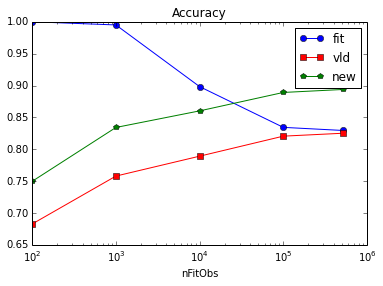

In [192]:
plt.figure()
plt.plot(models['nFitObs'], models['accuracy.fit'], 'bo-', label = 'fit')
plt.plot(models['nFitObs'], models['accuracy.vld'], 'rs-', label = 'vld')
plt.plot(models['nFitObs'], models['accuracy.new'], 'gp-', label = 'new')
plt.legend()
plt.title("Accuracy")
plt.xscale('log')
axes = plt.gca()
axes.set_xlabel('nFitObs')
# axes.set_xlim([mdlDF['l1_penalty'][mdlDF['RSS.vld'].argmin()] / 10 ** 2, \
#                mdlDF['l1_penalty'][mdlDF['RSS.vld'].argmin()] * 10 ** 2])
# axes.set_ylim([0, mdlDF['RSS.vld'].min() * 1.5])
plt.show()

In [123]:
print dspLabels

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']


In [154]:
import pandas as pd

[INFO] This non-commercial license of GraphLab Create is assigned to bbalaji8@gmail.com and will expire on December 09, 2016. For commercial licensing options, visit https://dato.com/buy/.

[INFO] Start server at: ipc:///tmp/graphlab_server-18168 - Server binary: /usr/local/lib/python2.7/site-packages/graphlab/unity_server - Server log: /tmp/graphlab_server_1454417383.log
[INFO] GraphLab Server Version: 1.8.1
